# Chapter 7 Object Detection

**OpenCV library:**

Traditionally people use colours and shapes to identify objects in the images.

**Deep Learning neural network models for Object Detection:**
* R-CNN - Region-Based Convolutional Neural Network(Two-Step Approach) , which includes R-CNN, Fast R-CNN, Faster R-CNN and the latest Mask R-CNN. 
* YOLO - You Only Look Once (One-Step Approach)
* SSD - Single-Shot Detector(One-Step Approach)

R-CNN is a two-step approach, first to identify regions and then detect objects in those regions using CNNs (Convolutional Neural Networks). YOLO (You Only Look Once) and SSD (Single-Shot Detector) is a one-step approach, which uses a CNN (Convolutional Neural Network) that is able to find all objects within an image in one step, hence “look once” and “single-shot”.

https://uk.mathworks.com/help/vision/ug/getting-started-with-r-cnn-fast-r-cnn-and-faster-r-cnn.html

https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e

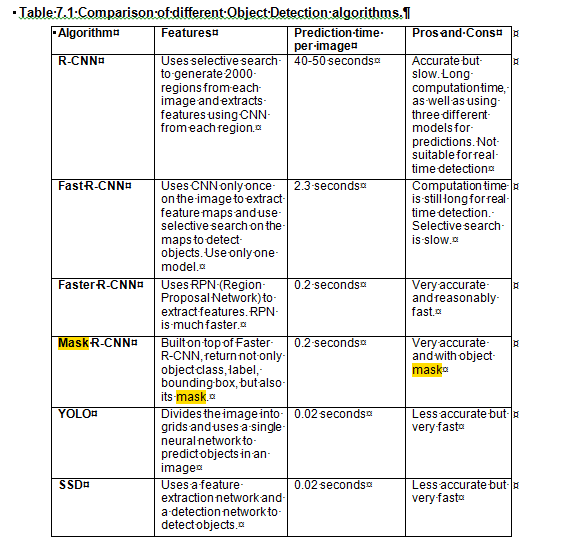

In summary, if you look for accurate Object Detection, choose Faster R-CNN or Mask R-CNN, and if you look for fast Object Detection, choose YOLO or SSD.

**1. Object Detection with OpenCV**

In [ ]:
#OpenCV object detection based cicle shapes
import cv2
import matplotlib.pyplot as plt

#img = cv2.imread("/kaggle/input/images/ball.jpeg")
img = cv2.imread("../input/images/ball.jpeg")
width,height,c=img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5) 
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,
                           param1=50,param2=30,minRadius=35,maxRadius=50)
print(circles)
for co, i in enumerate(circles[0, :], start=1):
    #print(i[0])
    cv2.circle(img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    cv2.circle(img,(int(i[0]),int(i[1])),2,(0,0,255),3)
    
print("Number of circles detected:", co)
#cv2.imshow('Circle Detection',img)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
# OpenCV FindContours Detection
import cv2
import numpy as np

img = cv2.imread("/kaggle/input/images/shapes1.jpeg")
width,height,c=img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5) 
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = np.array(cnts)[[cv2.contourArea(c)>10 for c in cnts]]

for c in cnts:
    area = cv2.contourArea(c)
    if area > 10:
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        M = cv2.moments(c)
        if M["m00"] != 0:
            cX = int((M["m10"] / M["m00"]) )
            cY = int((M["m01"] / M["m00"]) )
        cv2.circle(img, (cX,cY), 2, (255, 255,0), 2)
#cv2.imshow("Output", img)
#cv2.waitKey(0)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
#!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_fullbody.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml

In [ ]:
import time
import numpy as np
import cv2
classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
#classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')
frame = cv2.imread("/kaggle/input/images/faces.jpg")

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   
# Pass frame to the classifier
bodys = classifier.detectMultiScale(gray, 1.5, 5)
    
# Extract bounding boxes for any bodies identified
for (x,y,w,h) in bodys:
     cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

**2. Object Detection with YOLO**

In [ ]:
# https://github.com/pjreddie/darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
#!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names
    
#!wget https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/yolov3.cfg
#!wget https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/yolov3.txt

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
#!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg


In [ ]:
!wget https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/dog.jpg

In [ ]:
# https://github.com/arunponnusamy/object-detection-opencv

import cv2
import numpy as np


def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    
image = cv2.imread('dog.jpg')

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

classes = None

with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
#net = cv2.dnn.readNet('yolov4.weights', 'yolov4.cfg')

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)

outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4


for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

**3. Object Detection with MobileNet SSD**

In [ ]:
!wget -O 'MobileNetSSD_deploy.caffemodel' https://github.com/TheNsBhasin/DNN_Object_Detection/blob/master/MobileNetSSD_deploy.caffemodel?raw=true

In [ ]:
!wget -O 'MobileNetSSD_deploy.prototxt' https://raw.githubusercontent.com/TheNsBhasin/DNN_Object_Detection/master/MobileNetSSD_deploy.prototxt.txt

In [ ]:
!pip install imutils

In [ ]:

import numpy as np
import imutils
import cv2

prototxt = 'MobileNetSSD_deploy.prototxt'
model = 'MobileNetSSD_deploy.caffemodel'
confidence = 0.1

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

net = cv2.dnn.readNetFromCaffe(prototxt, model)

#frame = cv2.imread('dog.jpg')
frame = cv2.imread('../input/images/faces.jpg')

frame = imutils.resize(frame, width=400)
(h, w) = frame.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)),
    0.007843, (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()

for i in np.arange(0, detections.shape[2]):
        conf = detections[0, 0, i, 2]

        if conf > confidence:
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            label = "{}: {:.2f}%".format(CLASSES[idx],
                conf * 100)
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(frame, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


In [ ]:
# Delete files in /kaggle/working
import os
os.remove("./yolov3.cfg")


In [ ]:
#Delete folders recursively
for dirpath, dirnames, filenames in os.walk('/kaggle/working'):
    #other codes

    try:
        os.rmdir(dirpath)
    except OSError as ex:
        print(ex)

**4. Custom trained Object Detection**

**OpenCV tutorial—train your custom cascade/classifier/detector**
https://maciejzalwert.medium.com/opencv-tutorial-train-your-custom-classifier-e6f12b274296

**Train your own YOLOv3 detector**

https://blog.insightdatascience.com/how-to-train-your-own-yolov3-detector-from-scratch-224d10e55de2

**5. Other Object Detection Libraries**

https://github.com/TannerGilbert/Tensorflow-Object-Detection-with-Tensorflow-2.0

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/auto_examples/object_detection_camera.html

https://github.com/OlafenwaMoses/ImageAI 

https://cv.gluon.ai



**6. Gluon Object Detection Using Faster R-CNN Example**

In [ ]:
# https://cv.gluon.ai/build/examples_detection/demo_faster_rcnn.html
!pip install --upgrade mxnet

In [ ]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

In [ ]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

In [ ]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

In [ ]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

**7. Image Segmentation**

* Semantic Segmentation
* Instance Segmentation

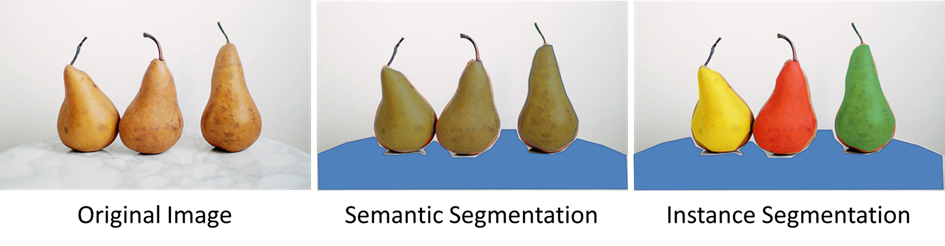

https://github.com/ayoolaolafenwa/PixelLib